In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as T

DATA_PATH = 'E://DATASET//dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
pallette = [[31, 119, 180],
             [255, 127, 14],
             [44, 160, 44],
             [214, 39, 40],
             [148, 103, 189],
             [140, 86, 75],
             [227, 119, 194],
             [127, 127, 127],
             [188, 189, 34],
             [23, 190, 207]]

In [2]:
# ----- Select 4 images
data_dsprite = np.load(DATA_PATH)

In [3]:
print(data_dsprite['latents_classes'][80+204800+245760*0])
print(data_dsprite['latents_classes'][80+204800+245760])  #7587
print(data_dsprite['latents_classes'][80+204800+245760*2])

[ 0  0  5  0  2 16]
[ 0  1  5  0  2 16]
[ 0  2  5  0  2 16]


In [4]:
square = data_dsprite['imgs'][80+204800+245760*0]
ellipse = data_dsprite['imgs'][80+204800+245760]
heart = data_dsprite['imgs'][80+204800+245760*2]

In [5]:
def colored(digit, color_id):
    digit = np.tile(digit[:, :, :, np.newaxis], 3)[0]
    c = pallette[color_id]
    digit[:, :, 0] = digit[:, :, 0] / 255 * c[0]
    digit[:, :, 1] = digit[:, :, 1] / 255 * c[1]
    digit[:, :, 2] = digit[:, :, 2] / 255 * c[2]
    return digit

In [6]:
square_ = np.expand_dims(square, axis=0).astype(float)
square_blue = colored(square_, 0)
square_red = colored(square_, 3)
square_pink = colored(square_, 6)
square_cyan = colored(square_, 9)

ellipse_ = np.expand_dims(ellipse, axis=0).astype(float)
ellipse_blue = colored(ellipse_, 0)
ellipse_red = colored(ellipse_, 3)
ellipse_pink = colored(ellipse_, 6)
ellipse_cyan = colored(ellipse_, 9)

heart_ = np.expand_dims(heart, axis=0).astype(float)
heart_blue = colored(heart_, 0)
heart_red = colored(heart_, 3)
heart_pink = colored(heart_, 6)
heart_cyan = colored(heart_, 9)

In [12]:
shape_list = ['square', 'ellipse', 'heart']
color_list = ['blue', 'red', 'pink', 'cyan']
npsave_tmp = np.zeros((12, 32, 32, 3))

for i in range(3):
    for j in range(4):
        idx = j+i*4
        npsave_tmp[idx,:,:,:] = eval('%s_%s'%(shape_list[i],color_list[j]))[15:15+32,2:2+32,:] #[::2,::2,:]

In [15]:
npsave_3x6 = np.zeros((18, 32, 32, 3))
OBJ_LIST = ['heart', 'square', 'ellipse']
heart_ = np.expand_dims(heart, axis=0).astype(float)
heart_blue = colored(heart_, 0)

for i in range(3):
    for j in range(6):
        obj = np.expand_dims(eval(OBJ_LIST[i]), axis=0).astype(float)
        obj_colored = colored(obj, j)
        idx = j+i*6
        npsave_3x6[idx,:,:,:] = obj_colored[15:15+32,2:2+32,:] #[::2,::2,:]

In [16]:
#np.save('E://P6_simplicity_bias//data//color_dsprite3x4.npy', npsave_tmp)

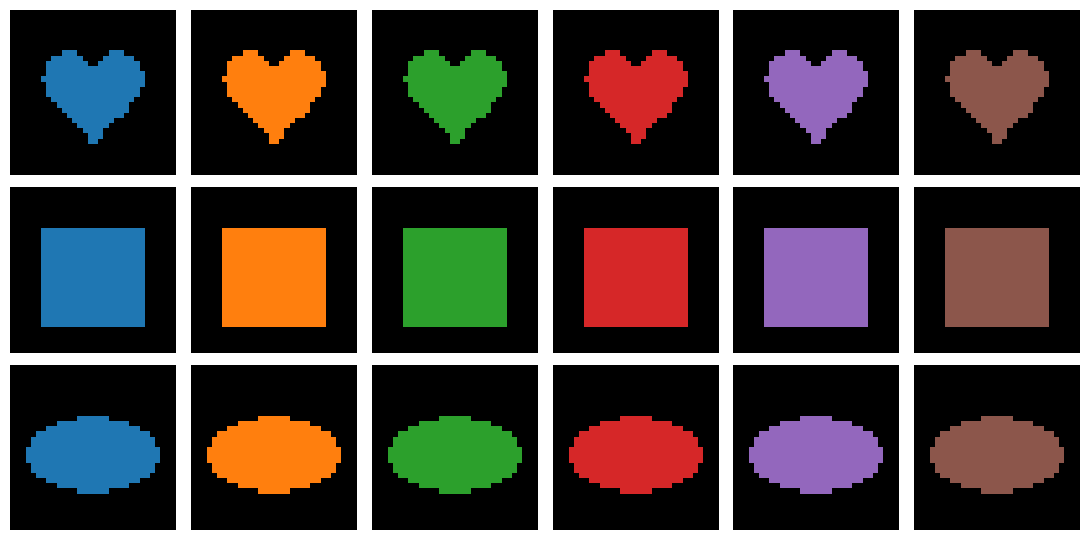

In [23]:
fig, ax = plt.subplots(3,6,figsize=(11,5.5))

for i in range(3):
    for j in range(6):
        idx = j+i*6
        ax[i][j].imshow(npsave_3x6[idx])
        ax[i][j].axis('off')
plt.tight_layout()
#plt.savefig('E://P6_simplicity_bias//figures//colored_dsprite.pdf')

In [106]:
tmp = np.load('E://P6_simplicity_bias//data//color_dsprite3x4.npy')

In [107]:
tmp.shape

(12, 64, 64, 3)